# Linear Regression on House Prices (1D) with Keras

All Rights Reserved © <a href="http://www.louisdorard.com">Louis Dorard</a>

<img src="http://s3.louisdorard.com.s3.amazonaws.com/DL_icon.png">

In this notebook we show how to perform linear regression on house prices data, using Keras.

## Define `X_train` and `y_train`

Run [House Prices 1D](House-Prices-1D.ipynb) notebook to create `data`

In [879]:
#%run House-Prices-1D.ipynb

In [880]:
%matplotlib inline
from pandas import read_csv
data = read_csv('../04-house-prices/origin-trainfull.csv')

Output is `SalePrice`

In [881]:
y_train = data.SalePrice.values.astype(float)

Use `Surface` as our only feature

In [882]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [883]:
data = data.fillna(0)

In [884]:
del data['SalePrice']
del data['Id']
del data['MSSubClass']
X_train = data.select_dtypes(exclude=['object']).values.astype(float)

In [885]:
data.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [886]:
from numpy import transpose
# X_train = transpose([X_train.astype(float)])

In [887]:
X_train.shape

(1460, 35)

## Visualize data in 2D

Initialize plotting lib

In [888]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use('dark_background')

The idea here is to find a line that "fits" the data.

## About Keras

* High-level API: describe NN structure in simple and convenient way
* Exists in TensorFlow, and outside (can use other libraries such as MXNet as numerical backend)

## Model relationship between `x` and  `y`

We're looking for `W` and `b` such that <!-- .element: class="fragment" -->

`x * W + b` is a good approximation of `y` <!-- .element: class="fragment" -->

for all `(x, y)` input-output pairs in training. <!-- .element: class="fragment" -->

Main model type in Keras is sequence of "layers", called `Sequential`. In our case:

* 1 input layer (for `x`)
* 1 output layer (for `y`)

In [889]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Activation
model = Sequential()

Alternative network creation:

In [890]:
model = Sequential([
    Input(shape=X_train.shape[1:]),
    Dense(1)
])

## Choose "loss" to minimize

* Error = difference between prediction `x * W + b` and true output `y`
* Compute Mean Squared Error over whole dataset
* MSE is a "loss function"; the smaller, the better
* Loss value depends on `W`, `b`, and dataset
    * => We want values of `W` and `b` that minimize loss on given training set.

In [891]:
loss = 'mse'

## Set up optimizer and "compile" model

Idea: iterative way to find lowest point of mountain, blindfolded?

* “What is the direction of steepest descent under my feet?” => _gradient_
* Follow gradient by a certain step size, called _learning step_ (or _learning rate_ ).
    
This is called _(Stochastic) Gradient Descent_.

![Gradient Descent - Aurélien Géron](figures/GD-Geron.png)

(See Figure 4-3 in _Hands-on ML_ book by Aurélien Géron)

In Keras, optimizer is specified when "compiling" model.

(Last step to fix model training code!)

In [892]:
from tensorflow.keras.optimizers import SGD
LEARNING_RATE = 0.01
model.compile(loss=loss, optimizer=SGD(lr=LEARNING_RATE))

Remarks:

* Procedure starts from random value => need to consider random number generator seed!
* Figure is in 1D, but 2 Dimensions when going down a mountain...
* Our linear regression problem is in 2D, because 2 parameters to learn (`W` and `b`)
* Benefits of "compiling" to be discussed in future notebook.

### Scale features

"Normalizing" the data should help prevent values from "exploding":

In [893]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

## Fit model (i.e. run optimization)

The model still hasn't "seen" any data yet...

* With SGD we can choose the amount of data to be used to compute the loss function (`BATCH_SIZE`). This can be useful when the whole dataset doesn't fit in memory. We'll revisit this later!
* We need to choose for how many iterations to run SGD (`EPOCHS`).
* The `fit` method is a loop over epochs and batches!

In [894]:
BATCH_SIZE = X_train.shape[0] # computing the loss over the whole dataset
EPOCHS = 200 # how many iterations over the whole dataset
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

Train on 1460 samples
Epoch 1/200
1460/1460 [==============================] - 0s 120us/sample - loss: 39039307776.0000
Epoch 2/200
1460/1460 [==============================] - 0s 1us/sample - loss: 36530733056.0000
Epoch 3/200
1460/1460 [==============================] - 0s 2us/sample - loss: 34379096064.0000
Epoch 4/200
1460/1460 [==============================] - 0s 2us/sample - loss: 32504666112.0000
Epoch 5/200
1460/1460 [==============================] - 0s 3us/sample - loss: 30847598592.0000
Epoch 6/200
1460/1460 [==============================] - 0s 3us/sample - loss: 29362839552.0000
Epoch 7/200
1460/1460 [==============================] - 0s 5us/sample - loss: 28016418816.0000
Epoch 8/200
1460/1460 [==============================] - 0s 3us/sample - loss: 26782625792.0000
Epoch 9/200
1460/1460 [==============================] - 0s 2us/sample - loss: 25641906176.0000
Epoch 10/200
1460/1460 [==============================] - 0s 3us/sample - loss: 24579334144.0000
Epoch 11/200
14

Epoch 86/200
1460/1460 [==============================] - 0s 3us/sample - loss: 2304899072.0000
Epoch 87/200
1460/1460 [==============================] - 0s 3us/sample - loss: 2262264064.0000
Epoch 88/200
1460/1460 [==============================] - 0s 2us/sample - loss: 2221302272.0000
Epoch 89/200
1460/1460 [==============================] - 0s 1us/sample - loss: 2181947392.0000
Epoch 90/200
1460/1460 [==============================] - 0s 2us/sample - loss: 2144134656.0000
Epoch 91/200
1460/1460 [==============================] - 0s 2us/sample - loss: 2107804160.0000
Epoch 92/200
1460/1460 [==============================] - 0s 2us/sample - loss: 2072897792.0000
Epoch 93/200
1460/1460 [==============================] - 0s 2us/sample - loss: 2039359104.0000
Epoch 94/200
1460/1460 [==============================] - 0s 3us/sample - loss: 2007134208.0000
Epoch 95/200
1460/1460 [==============================] - 0s 3us/sample - loss: 1976170752.0000
Epoch 96/200
1460/1460 [================

Epoch 171/200
1460/1460 [==============================] - 0s 2us/sample - loss: 1246289152.0000
Epoch 172/200
1460/1460 [==============================] - 0s 2us/sample - loss: 1244724096.0000
Epoch 173/200
1460/1460 [==============================] - 0s 2us/sample - loss: 1243215360.0000
Epoch 174/200
1460/1460 [==============================] - 0s 2us/sample - loss: 1241760640.0000
Epoch 175/200
1460/1460 [==============================] - 0s 2us/sample - loss: 1240357632.0000
Epoch 176/200
1460/1460 [==============================] - 0s 2us/sample - loss: 1239004288.0000
Epoch 177/200
1460/1460 [==============================] - 0s 2us/sample - loss: 1237699584.0000
Epoch 178/200
1460/1460 [==============================] - 0s 2us/sample - loss: 1236440448.0000
Epoch 179/200
1460/1460 [==============================] - 0s 2us/sample - loss: 1235225984.0000
Epoch 180/200
1460/1460 [==============================] - 0s 2us/sample - loss: 1234053504.0000
Epoch 181/200
1460/1460 [=====

[Plot data again](#Visualize-data).

### Reset model

Simplest way to reset all weights & biases is to re-execute the definition of `model`.

We can then fit again.

Remarks:

* Procedure starts from random value => need to consider random number generator seed!
* Figure is in 1D, but 2 Dimensions when going down a mountain...
* Our linear regression problem is in 2D, because 2 parameters to learn (`W` and `b`)
* Benefits of "compiling" to be discussed in future notebook.

## Review learning curve

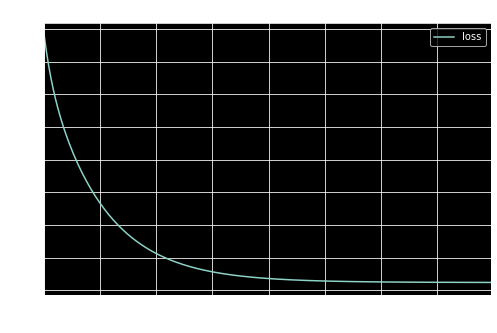

In [895]:
import pandas as pd
%matplotlib inline
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

## Visualize model

* Model is line defined by coefficient `W` and bias (a.k.a. intercept) `b`
* Just need to plot 2 points and link them... 
    * x-axis: let's choose minimum and maximum of `X_train`
    * y-axis: given by model's predictions

In [896]:
import numpy as np

In [897]:
y_predict = model.predict(X_train)

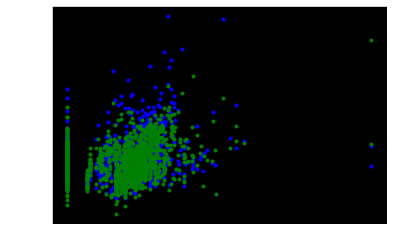

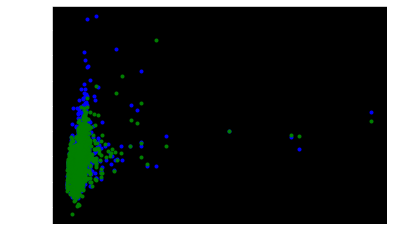

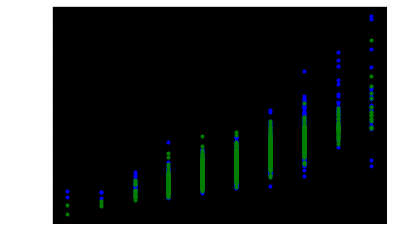

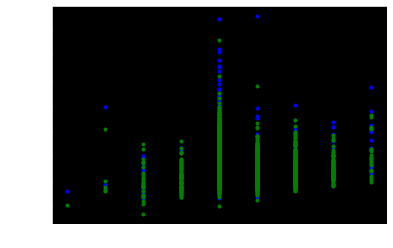

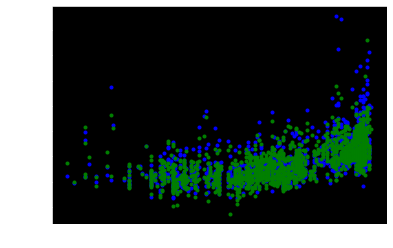

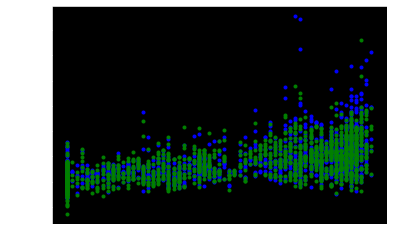

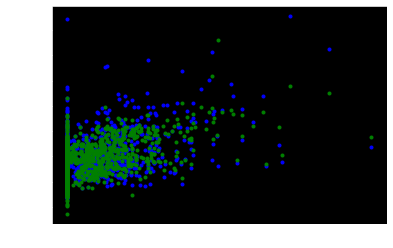

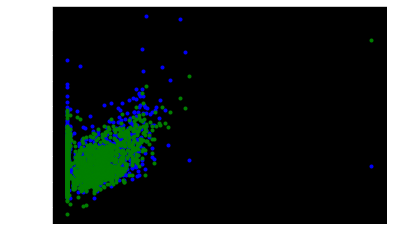

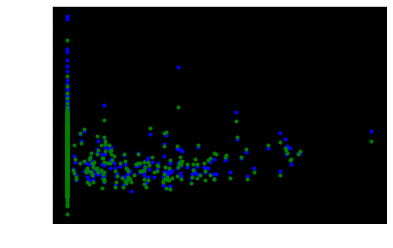

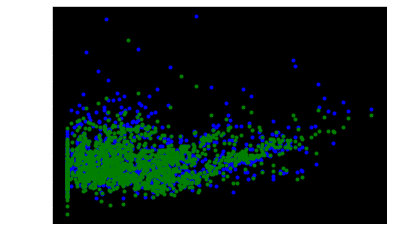

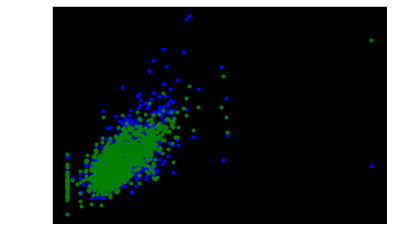

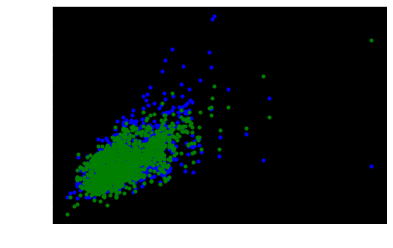

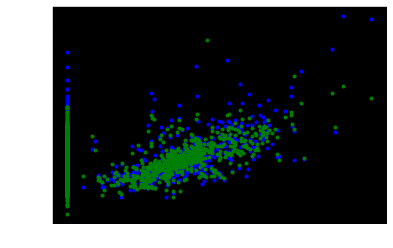

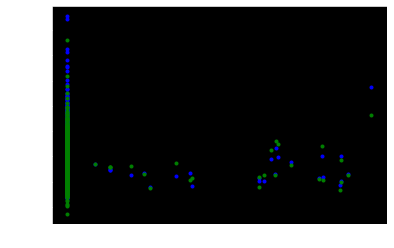

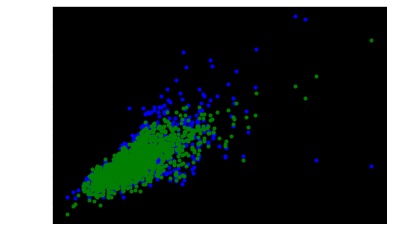

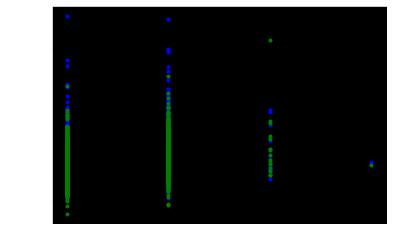

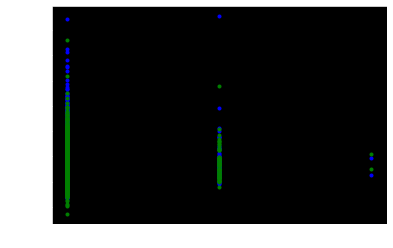

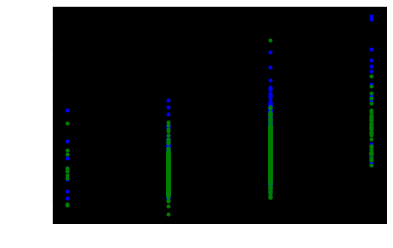

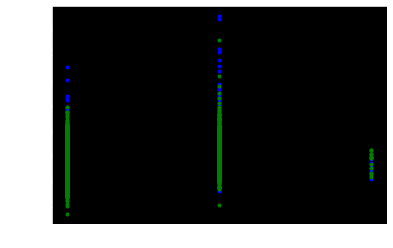

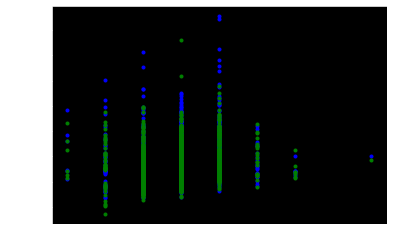

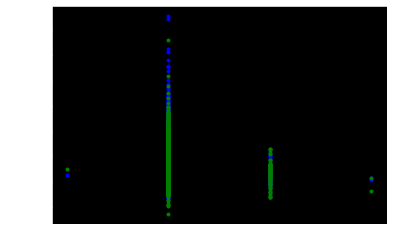

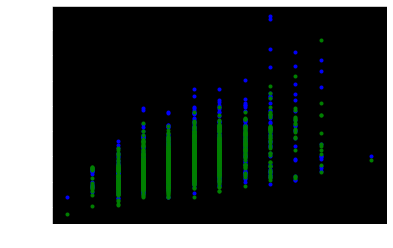

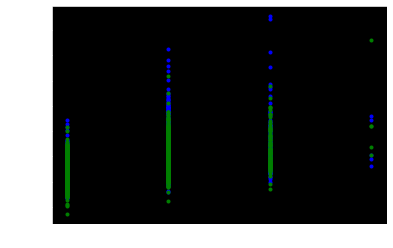

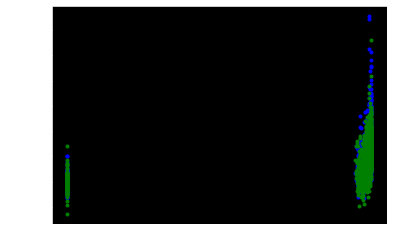

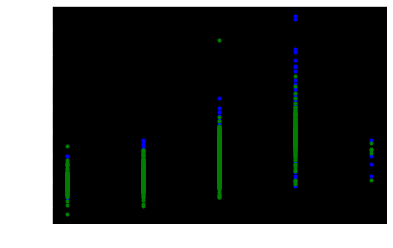

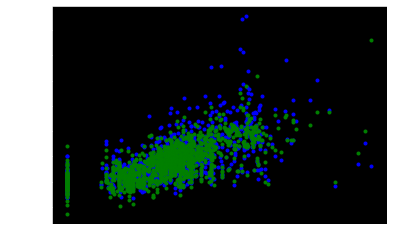

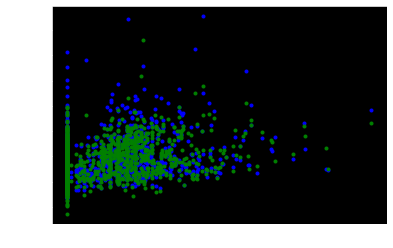

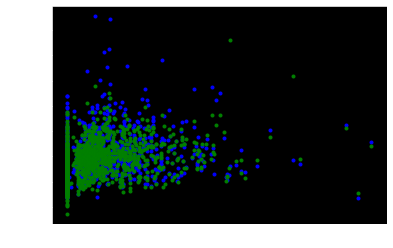

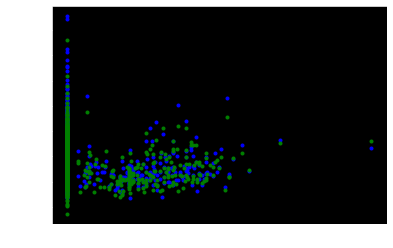

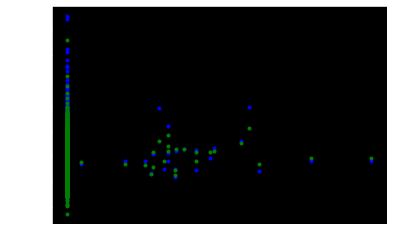

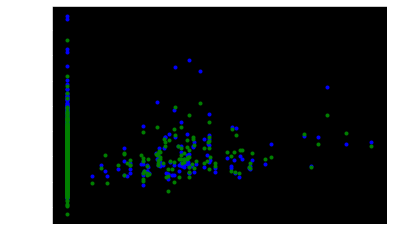

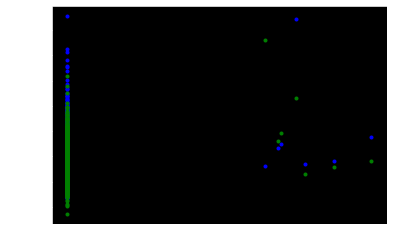

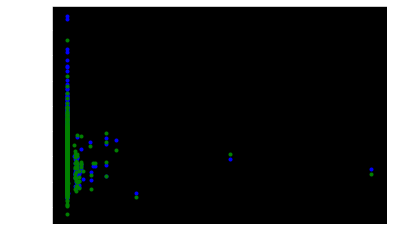

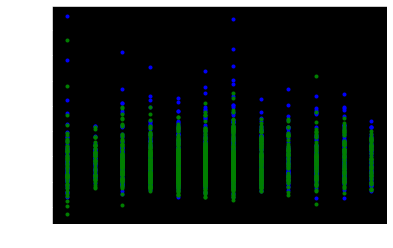

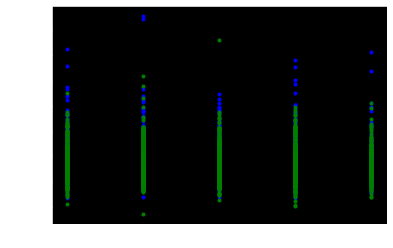

IndexError: index 35 is out of bounds for axis 1 with size 35

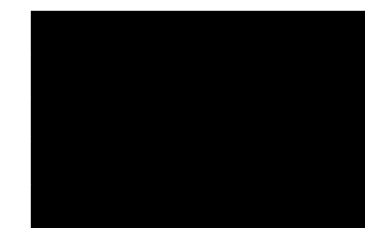

In [898]:
for i in range(features_number):
    plt.subplot(1,1,1)
    plt.plot(X_train[:,i], y_train, "b.")
    plt.plot(X_train[:,i], y_predict, "g.")
    plt.show()

In [900]:
from sklearn import metrics
#print('MSLE : ', metrics.mean_squared_log_error(y_train, y_predict))
print('MAE : ', metrics.mean_absolute_error(y_train, y_predict)) 

MAE :  20939.957619863013


Might want to increase learning rate?

## Change learning rate

### Learning rate too small

The loss decrease is too slow

![Gradient Descent with a small learning step - Aurélien Géron](figures/GD-small-learning-rate-Geron.png)

(See Figure 4-4 in _Hands-on ML_ book by Aurélien Géron)

### Learning rate too big

Depending on the initialization, it could converge slowly, or it could diverge 

![Gradient Descent with a big learning step - Aurélien Géron](figures/GD-big-learning-rate-Geron.png)

(See Figure 4-5 in _Hands-on ML_ book by Aurélien Géron)